# Imports of paper scrap (HS Code 4707) to Brazil 

The following notebook includes data downloaded from UN Comtrade, "a repository of official international trade statistics and relevant analytical tables." Data downloaded includes Brazil paper scrap import records per month from 2016 to 2021. The period of time was chosen based on data available through another trade data portal, Panjiva, and to account for significant market shifts that occurred in both 2018 and 2021. Paper scrap is classified under the HS Code 4707. 

Another analysis was performed to determine the most commonly used 6-digit HS code for imports of paper scrap to Brazil. Six-digit HS codes vary based on the material included in each bale. Data was downloaded for the same time period, excluding months in 2017 due to lack of records.

Data can be accessed here: https://comtrade.un.org/

Data from Panjiva, a subscription-based shipping database, was also analyzed to determine the companies importing the most paper scrap to Brazil and their top trading partners. Data for Brazil is available from 2016 to spring 2021.

Panjiva can be accessed here: https://panjiva.com/account/login

# Brazil 4707 imports overview

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 1000)
import matplotlib
%matplotlib inline
from datetime import datetime
import numpy as np
import re
import altair as alt
from vega_datasets import data

/Users/sheridanwall/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Merging & cleaning data

Due to limits on the amount that can be downloaded at a time, data was downloaded separately by all the months available per year. Some formatting changes were also made to the complete dataset. 

In [2]:
df2021 = pd.read_csv('Brazil-4707-imports-2021.csv')

In [3]:
df2020 = pd.read_csv('Brazil-4707-imports-2020.csv')

In [4]:
df2019 = pd.read_csv('Brazil-4707-imports-2019.csv')

In [5]:
df2018 = pd.read_csv('Brazil-4707-imports-2018.csv')

In [6]:
df2017 = pd.read_csv('Brazil-4707-imports-2017.csv')

In [7]:
df2016 = pd.read_csv('Brazil-4707-imports-2016.csv')

In [8]:
df2015 = pd.read_csv('Brazil-4707-imports-2015.csv')

In [9]:
# df2021.shape
# df2020.shape
# df2019.shape
# df2018.shape
# df2017.shape
# df2016.shape
# df2015.shape

In [10]:
imports = pd.concat([df2021, df2020, df2019, df2018, df2017, df2016, df2015])

In [11]:
imports.shape

(379, 35)

In [12]:
imports.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,Reporter ISO,Partner Code,Partner,Partner ISO,2nd Partner Code,2nd Partner,2nd Partner ISO,Customs Proc. Code,Customs,Mode of Transport Code,Mode of Transport,Commodity Code,Commodity,Qty Unit Code,Qty Unit,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,HS,2021,202103,Mar-21,4,0,1,Imports,76,Brazil,NaN,152,Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4707,Waste and scrap of paper and paperboard,NaN,NaN,NaN,NaN,NaN,NaN,276130.0,NaN,72153,NaN,NaN,0
1,HS,2021,202103,Mar-21,4,0,1,Imports,76,Brazil,NaN,188,Costa Rica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4707,Waste and scrap of paper and paperboard,NaN,NaN,NaN,NaN,NaN,NaN,105670.0,NaN,25041,NaN,NaN,0
2,HS,2021,202103,Mar-21,4,0,1,Imports,76,Brazil,NaN,214,Dominican Rep.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4707,Waste and scrap of paper and paperboard,NaN,NaN,NaN,NaN,NaN,NaN,540420.0,NaN,132198,NaN,NaN,0
3,HS,2021,202103,Mar-21,4,0,1,Imports,76,Brazil,NaN,591,Panama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4707,Waste and scrap of paper and paperboard,NaN,NaN,NaN,NaN,NaN,NaN,168570.0,NaN,46189,NaN,NaN,0
4,HS,2021,202103,Mar-21,4,0,1,Imports,76,Brazil,NaN,600,Paraguay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4707,Waste and scrap of paper and paperboard,NaN,NaN,NaN,NaN,NaN,NaN,1351360.0,NaN,170210,NaN,NaN,0


In [13]:
imports_clean = imports[imports.Partner != "World"]

In [14]:
imports_clean['Weight'] = imports_clean['Netweight (kg)']

<ipython-input-14-fd416a680bd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imports_clean['Weight'] = imports_clean['Netweight (kg)']


In [15]:
imports_clean['Value'] = imports_clean['Trade Value (US$)']

<ipython-input-15-4ec40d792fcd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imports_clean['Value'] = imports_clean['Trade Value (US$)']


In [16]:
imports_clean['date'] =  pd.to_datetime(imports_clean['Period'], format='%Y%m')

<ipython-input-16-55e9a5d4ac7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imports_clean['date'] =  pd.to_datetime(imports_clean['Period'], format='%Y%m')


# Analysis

The goal of this analysis is to determine how the imports of paper waste to Brazil changed throughout the time period, including the amount shipped in weight as well as the primary trading partners. First, the weight of paper scrap was compared per year, and a spike in imports was noted in 2021. A closer look at imports by weight per month shows an increase beginning in late 2020 and continuing into spring 2021. An analysis of trading partners shows that Brazil has increasingly relied on the United States for paper scrap. Though Paraguay and Uruguay used to provide more paper scrap, the U.S. is now the primary trading partner.

<AxesSubplot:ylabel='Year'>

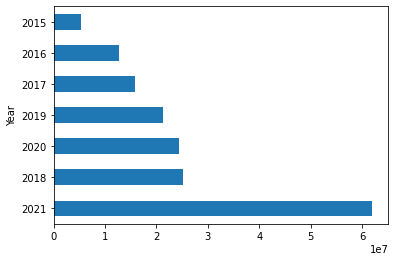

In [17]:
imports_clean.groupby('Year').Weight.sum().sort_values(ascending=False).plot(kind='barh')

In [18]:
imports_yr= imports_clean.groupby('Year').Weight.sum().reset_index()

In [19]:
imports_yr

,Year,Weight
0,2015,5381997.0
1,2016,12698181.0
2,2017,15794133.0
3,2018,25140659.0
4,2019,21359500.0
5,2020,24338949.0
6,2021,61993109.0


In [21]:
imports_yr.Weight.mean()

23815218.285714287

In [22]:
imports_yr['Year'] = imports_yr['Year'].astype(str)

In [20]:
imports_yr.to_csv("Brazil-paperscrap-imports-2015-2021")

In [25]:
alt.Chart(imports_yr).mark_bar().encode(
    x='Weight',
    y= 'Year'
).properties(
    title='Paper scrap imports to Brazil skyrocket in 2021')

alt.Chart(...)

In [27]:
month_avg_imports = imports_clean.groupby(pd.PeriodIndex(imports_clean['date'], freq="M"))['Weight'].mean().reset_index()

In [28]:
month_avg_imports['date'] = month_avg_imports['date'].astype(str)

In [29]:
alt.Chart(month_avg_imports).mark_line().encode(
    x='date',
    y='Weight'
).properties(
    title='Paper Scrap Imports to Brazil per month')

alt.Chart(...)

In [31]:
yr_avg_imports = imports_clean.groupby(pd.PeriodIndex(imports_clean['date'], freq="Y"))['Weight'].mean().reset_index()

In [32]:
yr_avg_imports['date'] = yr_avg_imports['date'].astype(str)

In [33]:
alt.Chart(yr_avg_imports).mark_line().encode(
    x='date',
    y='Weight'
).properties(
    title='Paper Scrap Imports to Brazil per year')

alt.Chart(...)

In [34]:
imports_clean.groupby(['Partner']).Weight.sum().sort_values(ascending=False)

Partner
United States of America    101887071.0
Paraguay                     28955980.0
Uruguay                      18309191.0
Dominican Rep.               10241466.0
Chile                         2122000.0
Panama                        1515766.0
Nicaragua                      973811.0
Spain                          405900.0
Canada                         372003.0
Portugal                       342640.0
Peru                           269930.0
Costa Rica                     210680.0
Netherlands                    181270.0
Poland                         156700.0
Germany                        131681.0
Malta                          105740.0
Russian Federation             105628.0
United Kingdom                 101340.0
Israel                          64773.0
China                           52529.0
Finland                         51600.0
Honduras                        41214.0
Mexico                          34970.0
Italy                           25926.0
Guatemala                       

<AxesSubplot:ylabel='Partner'>

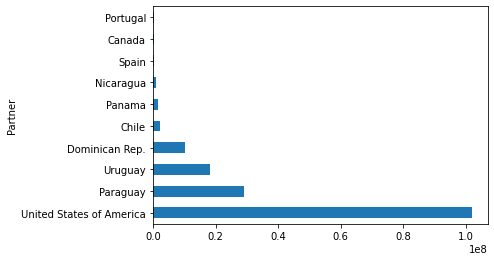

In [35]:
imports_clean.groupby(['Partner']).Weight.sum().sort_values(ascending=False).head(10).plot(kind='barh')

In [36]:
imports_part = imports_clean.groupby(['Partner']).Weight.sum().sort_values(ascending=False).head(10).reset_index()

In [37]:
alt.Chart(imports_part).mark_bar().encode(
    x='Weight:Q',
    y=alt.Y('Partner:N', sort='-x')
).properties(
    title='Top Paper Scrap Trading Partners')

alt.Chart(...)

In [38]:
yr_partner = imports_clean.groupby(['Year','Partner']).Weight.sum().sort_values(ascending=False).head(25).reset_index()

In [39]:
yr_partner

,Year,Partner,Weight
0,2021,United States of America,51157554.0
1,2020,United States of America,17411520.0
2,2019,United States of America,13539906.0
3,2018,United States of America,10636516.0
4,2018,Uruguay,6667365.0
5,2017,Paraguay,6035210.0
6,2018,Paraguay,5874400.0
7,2016,Paraguay,5819640.0
8,2017,United States of America,5522480.0
9,2015,Paraguay,4531000.0


In [40]:
alt.Chart(yr_partner).mark_bar().encode(
    x='Year:O',
    y='sum(Weight):Q',
    color='Year:N',
    column='Partner:N'
)

alt.Chart(...)

In [41]:
us = yr_partner[yr_partner.Partner == 'United States of America']

In [42]:
us

,Year,Partner,Weight
0,2021,United States of America,51157554.0
1,2020,United States of America,17411520.0
2,2019,United States of America,13539906.0
3,2018,United States of America,10636516.0
8,2017,United States of America,5522480.0
14,2016,United States of America,3160297.0


In [43]:
alt.Chart(us).mark_bar().encode(
    x='Weight:Q',
    y=alt.Y('Year:N', sort='-x')
).properties(
    title='Imports of Paper Waste to Brazil from the U.S.')

alt.Chart(...)

# 6-digit HS Code

# Merging & cleaning data

In [56]:
HS2021 = pd.read_csv('Brazil_6DigitCodes_2021.csv')

In [57]:
HS2020 = pd.read_csv('Brazil_6DigitCodes_2020.csv')

In [58]:
HS2019 = pd.read_csv('Brazil_6DigitCodes_2019.csv')

In [59]:
HS2018 = pd.read_csv('Brazil_6DigitCodes_2018.csv')

In [60]:
HS2016 = pd.read_csv('Brazil_6DigitCodes_2016.csv')

In [61]:
all_HS = pd.concat([HS2021, HS2020, HS2019, HS2018, HS2016])

In [62]:
all_HS.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,Reporter ISO,Partner Code,Partner,Partner ISO,2nd Partner Code,2nd Partner,2nd Partner ISO,Customs Proc. Code,Customs,Mode of Transport Code,Mode of Transport,Commodity Code,Commodity,Qty Unit Code,Qty Unit,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,HS,2021,202101,January 2021,6,1,1,Imports,76,Brazil,NaN,620,Portugal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470730,"Paper or paperboard; waste and scrap, of paper...",NaN,NaN,NaN,NaN,NaN,NaN,50220.0,NaN,10313,NaN,NaN,0
1,HS,2021,202101,January 2021,6,1,1,Imports,76,Brazil,NaN,0,World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470730,"Paper or paperboard; waste and scrap, of paper...",NaN,NaN,NaN,NaN,NaN,NaN,50220.0,NaN,10313,NaN,NaN,0
2,HS,2021,202104,April 2021,6,1,1,Imports,76,Brazil,NaN,600,Paraguay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470790,"Paper or paperboard; waste and scrap, of paper...",NaN,NaN,NaN,NaN,NaN,NaN,1476020.0,NaN,193002,NaN,NaN,0
3,HS,2021,202104,April 2021,6,1,1,Imports,76,Brazil,NaN,616,Poland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470790,"Paper or paperboard; waste and scrap, of paper...",NaN,NaN,NaN,NaN,NaN,NaN,106000.0,NaN,20712,NaN,NaN,0
4,HS,2021,202104,April 2021,6,1,1,Imports,76,Brazil,NaN,558,Nicaragua,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470790,"Paper or paperboard; waste and scrap, of paper...",NaN,NaN,NaN,NaN,NaN,NaN,206485.0,NaN,64129,NaN,NaN,0


In [63]:
all_HS.shape

(417, 35)

In [64]:
all_HS['Weight'] = all_HS['Netweight (kg)']

In [65]:
all_HS['Value'] = all_HS['Trade Value (US$)']

In [66]:
all_HS['date'] =  pd.to_datetime(all_HS['Period'], format='%Y%m')

# Analysis

In [67]:
totals = all_HS['Commodity Code'].value_counts().reset_index()

In [68]:
totals = totals.rename(columns={'index':'Commodity_Code','Commodity Code':'Count'})

In [69]:
alt.Chart(totals).mark_bar().encode(
    x='Count:Q',
    y=alt.Y('Commodity_Code:N', sort='-x')
).properties(
    title='Paper Waste HS Codes Imported to Brazil 2016-2021')

alt.Chart(...)

In [70]:
alt.Chart(all_HS).mark_bar().encode(
    x='sum(Weight):Q',
    y=alt.Y('Commodity Code:O',sort='-x')
).properties(
    title='Paper Scrap Imports to Brazil 2020-2021')

alt.Chart(...)

In [71]:
all_HS_yr = all_HS.groupby(['Year','Commodity Code']).Weight.sum().reset_index()

In [72]:
all_HS_yr.head()

,Year,Commodity Code,Weight
0,2016,470710,8456012.0
1,2016,470720,464300.0
2,2016,470730,4244612.0
3,2016,470790,10606830.0
4,2018,470710,25223450.0


In [73]:
alt.Chart(all_HS_yr).mark_bar().encode(
    x='Year:O',
    y='sum(Weight):Q',
    color='Year:N',
    column='Commodity Code:N'
).properties(
    title='6-Digit Paper Scrap Code per year')

alt.Chart(...)

In [74]:
alt.Chart(all_HS).mark_bar().encode(
    x='Period:O',
    y='sum(Weight):Q',
    color='Year:N',
    column='Commodity Code:N'
).properties(
    title='Paper Scrap Imports to Brazil per month')

alt.Chart(...)

In [75]:
all_HS_Partner = all_HS.groupby(['Partner','Commodity Code']).Weight.sum().sort_values(ascending=False).reset_index()

In [76]:
HS_Partner = all_HS_Partner[all_HS_Partner['Partner'] != 'World']

In [77]:
HS_Partner

,Partner,Commodity Code,Weight
1,United States of America,470710,75751129.0
3,Paraguay,470790,18373200.0
4,Uruguay,470710,14508350.0
6,United States of America,470730,12381435.0
7,Dominican Rep.,470710,9576866.0
8,United States of America,470790,7299803.0
9,Panama,470710,1220717.0
10,Chile,470710,976280.0
11,Nicaragua,470710,767326.0
12,Chile,470790,717350.0


In [78]:
alt.Chart(HS_Partner).mark_bar().encode(
    x='Partner:O',
    y='sum(Weight):Q',
    color='Partner:N',
    column='Commodity Code:N'
).properties(
    title='Brazil trading partners per 6-Digit HS Code')

alt.Chart(...)

# Companies and partners on Panjiva

Data for this analysis was downloaded and cleaned using Open Refine before import to this notebook. Companies that were independently verified to be in the same corporate group or controlled by the same individuals or entities were renamed to reflect this connection.

In [79]:
panjiva = pd.read_csv('Brazil-4707-Panjiva.csv')

In [80]:
panjiva.shape

(1277, 26)

In [81]:
panjiva.dtypes

Shipment Date              object
Matching Fields            object
Consignee                  object
Consignee_Clean            object
Consignee Full Address     object
Consignee_Address          object
Consignee Email 1         float64
Consignee Phone 1          object
Consignee Website 1       float64
Consignee Profile          object
Consignee Trade Roles      object
Shipper                    object
Shipper_Clean              object
Shipper Full Address       object
Shipper_Address            object
Shipper Email 1            object
Shipper Phone 1            object
Shipper Website 1          object
Shipper Profile            object
Shipper Trade Roles        object
Notify Party               object
Notify_Party               object
HS Code                     int64
Goods Shipped              object
Volume (TEU)              float64
Gross Weight (kg)         float64
dtype: object

In [82]:
panjiva.head()

,Shipment Date,Matching Fields,Consignee,Consignee_Clean,Consignee Full Address,Consignee_Address,Consignee Email 1,Consignee Phone 1,Consignee Website 1,Consignee Profile,Consignee Trade Roles,Shipper,Shipper_Clean,Shipper Full Address,Shipper_Address,Shipper Email 1,Shipper Phone 1,Shipper Website 1,Shipper Profile,Shipper Trade Roles,Notify Party,Notify_Party,HS Code,Goods Shipped,Volume (TEU),Gross Weight (kg)
0,2021-07-31,HS Code (4-digit),Klabin Sa,Klabin Sa,"Av. Cristóvão Colombo, Piracicaba - SP, Brazil","Av. Cristóvão Colombo, Piracicaba - SP, Brazil",NaN,NaN,NaN,https://panjiva.com/Klabin-SA/41673482,NaN,Cellmark Inc.,Cellmark Inc.,"4294 Swinnea Rd, Memphis, TN 38118, USA","4294 Swinnea Rd, Memphis, TN 38118, USA",anamaria.candanoza@cellmark.com,+1 415 945 2400,NaN,https://panjiva.com/Cellmark-Inc/34600185,Logistics,KLABIN SA,KLABIN SA,47071000,3 X 40 CONTAINERS CONTAINING 90 BALES OF WASTE...,6.0,74844.00
1,2021-07-31,HS Code (4-digit),Klabin Sa,Klabin Sa,"Rua Henedina de Oliveira Bresler, 150 - Sol Na...","Rua Henedina de Oliveira Bresler, 150 - Sol Na...",NaN,NaN,NaN,https://panjiva.com/Klabin-SA/108471773,NaN,Cellmark Inc.,Cellmark Inc.,"4294 Swinnea Rd, Memphis, TN 38118, USA","4294 Swinnea Rd, Memphis, TN 38118, USA",anamaria.candanoza@cellmark.com,+1 415 945 2400,NaN,https://panjiva.com/Cellmark-Inc/34600185,Logistics,KLABIN SA,KLABIN SA,47071000,10 X 40 CONTAINERS CONTAINING 307 BALES OF WAS...,20.0,247781.01
2,2021-07-31,HS Code (4-digit),Fernandez Sa Industria De Papel,Fernandez Sa Industria De Papel,"Av. Pref. Raul de Oliveira Fagundes, 6 - Centr...","Av. Pref. Raul de Oliveira Fagundes, 6 - Centr...",NaN,NaN,NaN,https://panjiva.com/Fernandez-SA-Industria-De-...,Manufacturer,Ekman,Ekman,United States,United States,NaN,NaN,NaN,https://panjiva.com/Ekman/108474207,NaN,FERNANDEZ SA INDUSTRIA DE PAPEL,FERNANDEZ SA INDUSTRIA DE PAPEL,47071000,4 X 40 CONTAINERS CONTAINING 160 BALES OF WAST...,8.0,99791.00
3,2021-07-28,HS Code (4-digit),Pbl Assessoria De Comercio Exterior Ltda,Pbl Assessoria De Comercio Exterior Ltda,"R. Fiação da Saúde, 64 - 303 - Vila da Saúde, ...","R. Fiação da Saúde, 64 - 303 - Vila da Saúde, ...",NaN,NaN,NaN,https://panjiva.com/Pbl-Assessoria-De-Comercio...,NaN,Kce Logistics Inc.,Kce Logistics Inc.,United States,United States,NaN,NaN,NaN,https://panjiva.com/Kce-Logistics-Inc/87849587,Logistics,PBL ASSESSORIA DE COMERCIO EXTERIOR LTDA,PBL ASSESSORIA DE COMERCIO EXTERIOR LTDA,47070000,3 X 40 CONTAINERS CONTAINING 108 BALES OF CORR...,6.0,66096.00
4,2021-07-28,HS Code (4-digit),Klabin Sa,Klabin Sa,"Rua Henedina de Oliveira Bresler, 150 - Sol Na...","Rua Henedina de Oliveira Bresler, 150 - Sol Na...",NaN,NaN,NaN,https://panjiva.com/Klabin-SA/108471773,NaN,Cellmark Inc.,Cellmark Inc.,"4294 Swinnea Rd, Memphis, TN 38118, USA","4294 Swinnea Rd, Memphis, TN 38118, USA",anamaria.candanoza@cellmark.com,+1 415 945 2400,NaN,https://panjiva.com/Cellmark-Inc/34600185,Logistics,KLABIN SA,KLABIN SA,47071000,10 X 40 CONTAINERS CONTAINING 400 BALES OF WAS...,20.0,203307.01


In [83]:
panjiva['Gross_Weight']=panjiva['Gross Weight (kg)']

In [84]:
panjiva['Year'] = pd.DatetimeIndex(panjiva['Shipment Date']).year

In [85]:
panjiva['Shipper_Clean'] = panjiva.Shipper_Clean.replace({
    'Ekman Recycling':'Ekman & Co Inc.',
    'Ekman':'Ekman & Co Inc.'
})

In [86]:
panjiva['Consignee_Clean'] = panjiva.Consignee_Clean.replace({
    'Penha Papeis & Embalagens Ltda':'Penha',
    'Fabrica De Papel E Papelao Nossa Senhora Da Penha Sa':'Penha',
    'Penha Embalagens Bahia Ltda':'Penha',
    'Penha Papeis Vivida Ltda':'Penha'
})

In [87]:
panjiva['Consignee_Clean'] = panjiva.Consignee_Clean.replace({
    'Novacki Papel & Embalagens Sa':'Novacki',
    'Compensados Novacki Ltda':'Novacki',
})

In [88]:
panjiva['Consignee_Clean'] = panjiva.Consignee_Clean.replace({
    'Intl Paper Do Brasil Ltda':'International Paper Co',
    'Orsa International Paper Embalagens Sa':'International Paper Co'
})

# Analysis

In [89]:
panjiva.groupby('Consignee_Clean').Gross_Weight.sum().sort_values(ascending=False).head(20)


Consignee_Clean
Trombini Embalagens Sa                                47254565.19
Adami Sa Madeiras                                     27188004.11
Sanovo Greenpack Embalagens Do Brasil Ltda            17597764.96
Irani Papel E Embalagem S.A.                          15824005.01
Avelino Bragagnolo Sa Industria E Comercio             7900947.03
Starhouse Logistica & Transporte Multimodal Ltda       6751054.01
Penha                                                  6667420.05
Cartonificio Valinhos Sa                               6013256.03
Jaepel Papeis E Embalagens Sa                          5910963.05
Craft Multimodal Ltda                                  5412999.01
Novacki                                                5255977.04
Industria De Embalagens Tocantins Ltda                 5205968.05
Klabin Sa                                              5056977.02
Smurfit Kappa Do Brasil Industria De Embalagens Sa     4643699.01
Fr Meyers Sohn Forwarding Group                        40557

In [90]:
alt.Chart(panjiva).mark_bar().encode(
    x='sum(Gross_Weight):Q',
    y=alt.Y('Consignee_Clean:O', sort = '-x')
).properties(
    title='Companies Importing Paper Scrap to Brazil')

alt.Chart(...)

In [91]:
yr_cons = panjiva.groupby(['Year','Consignee_Clean']).Gross_Weight.sum().sort_values(ascending=False).head(30).reset_index()

In [92]:
alt.Chart(yr_cons).mark_bar().encode(
    x='Consignee_Clean:O',
    y='sum(Gross_Weight):Q',
    color='Consignee_Clean:N',
    column='Year:N'
).properties(
    title='Companies Importing Paper Scrap to Brazil (Weight per year)')

alt.Chart(...)